In [1]:
import pickle
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
all_NPs = pickle.load(open('data/example2.NPs.pkl', 'rb'))
all_span_embs = np.load('data/example2.span_embs.npy')
print(all_NPs)
print(all_span_embs.shape)
cosine_matrix = cosine_similarity(all_span_embs)
print(cosine_matrix)

[('Donald John Trump', 0, 2, 0), ('the 45th and current president of the United States', 4, 12, 0), ('she', 4, 4, 1), ('a businessman and television personality', 6, 10, 1), ('politics', 2, 2, 1), ('Trump', 0, 0, 2), ("a bachelor 's degree in economics", 16, 21, 2), ('the Wharton School at the University of Pennsylvania', 23, 30, 2), ('the New York City borough of Queens', 6, 12, 2)]
(9, 1024)
[[1.0000002  0.09817498 0.6258612  0.12837136 0.16428456 0.78138417
  0.19852626 0.16931625 0.11798018]
 [0.09817498 1.         0.07680462 0.8092515  0.58279437 0.149193
  0.14794938 0.7134426  0.5789315 ]
 [0.6258612  0.07680462 0.99999976 0.06600339 0.09444088 0.60803413
  0.20481521 0.07752003 0.03047627]
 [0.12837136 0.8092515  0.06600339 0.99999976 0.5534705  0.15126772
  0.19063057 0.6673199  0.5532269 ]
 [0.16428456 0.58279437 0.09444088 0.5534705  0.99999994 0.23180889
  0.12335919 0.5859856  0.5454477 ]
 [0.78138417 0.149193   0.60803413 0.15126772 0.23180889 1.0000001
  0.203094   0.192

In [3]:
G = nx.Graph()
for i in range(len(all_NPs)):
    for j in range(i, len(all_NPs)):
        G.add_edge(all_NPs[i][0][:15], all_NPs[j][0][:15], weight=cosine_matrix[i][j])

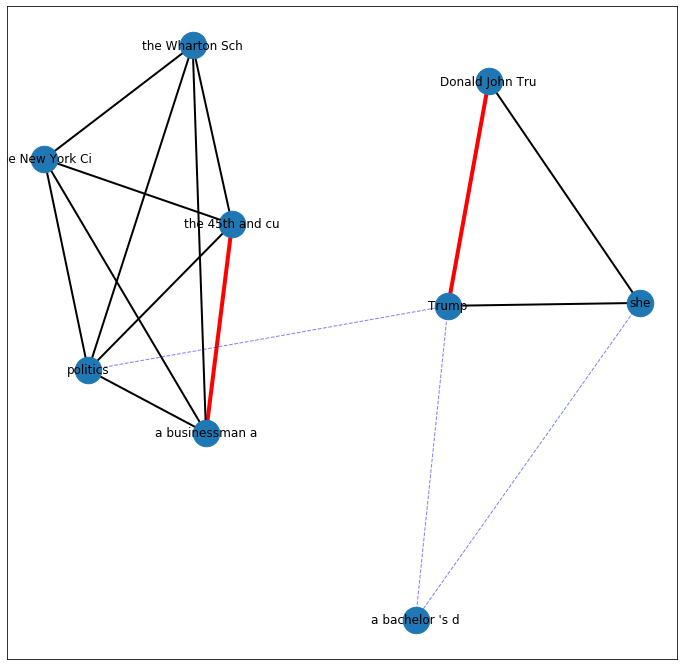

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#nx.draw(G, with_labels=True)

plt.figure(1,figsize=(12,12)) 

emost = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.75]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if 0.5 < d['weight'] <= 0.75]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.2 < d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=emost,
                       width=4, edge_color='r')
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=2)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos)

plt.show()

Donald John Trump is the 45th and current president of the United States. 
Before entering politics, he was a businessman and television personality. 
Trump was born and raised in the New York City borough of Queens, and received a bachelor's degree in economics from the Wharton School at the University of Pennsylvania.

`[('Donald John Trump', 0, 2, 0), 
  ('the 45th and current president of the United States', 4, 12, 0), 
  ('he', 4, 4, 1), ('a businessman and television personality', 6, 10, 1), 
  ('politics', 2, 2, 1), ('Trump', 0, 0, 2), 
  ("a bachelor 's degree in economics", 16, 21, 2), 
  ('the Wharton School at the University of Pennsylvania', 23, 30, 2), 
  ('the New York City borough of Queens', 6, 12, 2)]`